# Statistical Tests Tutorial

Shamelessly stolen from:  
https://github.com/eceisik/eip/blob/main/hypothesis_testing_examples.ipynb

### imports

In [30]:
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

In [31]:
def check_normality(data, threshold=30):
    """
    Perform a normality test using the Shapiro-Wilk test for small samples
    and the Kolmogorov-Smirnov test for larger samples.

    Parameters:
    data (list or array-like): The sample data to test for normality.
    threshold (int): The sample size threshold to switch between tests. Default is 30.

    Returns:
    test_name (str): The name of the test performed.
    statistic (float): The test statistic.
    p_value (float): The p-value of the test.
    """
    
    n = len(data)
    
    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    
    print("p value:%.4f" % p_value)
    if p_value <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is probably normally distributed") 

In [32]:
# Before a t-test check the equal variance assumption
def check_variance_homogeneity(group1, group2):
    test_stat, p_val = stats.levene(group1, group2)
    print("p value:%.4f" % p_val)
    if p_val <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [33]:
def make_histogram(data, bins=30):
    sns.histplot(data, bins=bins, kde=False)
    plt.title('Histogram of Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [34]:
def make_qq_plot(data):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.grid(True)
    plt.show()

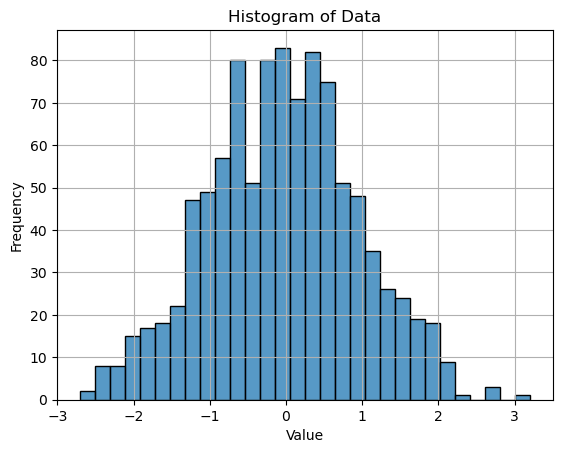

p value:0.8811
Fail to reject null hypothesis >> The data is probably normally distributed


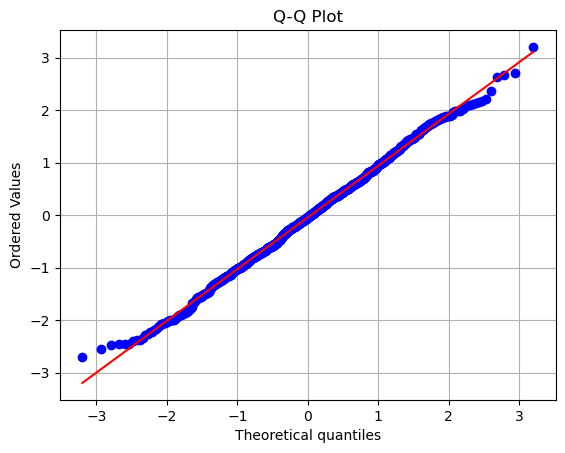

In [7]:
data = np.random.normal(loc=0, scale=1, size=1000)
make_histogram(data)
check_normality(data)
make_qq_plot(data)

------------

## Q1.

An analyst of a financial investment company is curious about the relationship between gender and risk appetite. A random sample was taken of 660 customers from the database. The customers in the sample were classified according to their gender and their risk appetite. The result is given in the following table.

| **Gender/Risk Appetite** | Very Low | Low | Medium | High | Very High | Total |
|:--------------------:|:--------:|:---:|:------:|:----:|:---------:|:-----:|
|        **Female**        |    53    |  23 |   30   |  36  |     88    |  230  |
|         **Male**         |    71    |  48 |   51   |  57  |    203    |  430  |
|         **Total**        |    124   |  71 |   81   |  93  |    291    |  660  |

$H_{0}$: Gender and risk appetite are independent.   
$H_{1}$: Gender and risk appetite are dependent. 

chi2 test should be used for this question. This test is known as the Chi-Square Test of Independence. It implies that if the observed data are very close to the expected data. The assumption of this test every Ei ≥ 5 (in at least 80% of the cells) which is satisfied.

In [8]:
from scipy.stats import chi2_contingency

obs =np.array([[53, 23, 30, 36, 88],[71, 48, 51, 57, 203]])
chi2, p, dof, ex = chi2_contingency(obs, correction=False)


# Check if all expected frequencies are >= 5
expected_frequencies_valid = np.all(ex >= 5)

if not expected_frequencies_valid:
    print("Warning: Some expected frequencies are less than 5. Consider combining categories or using an alternative test.")
else:
    print("All expected frequencies are >= 5.")
    

print("expected frequencies:\n ", np.round(ex,2))
print("degrees of freedom:", dof)
print("test stat :%.4f" % chi2)
print("p value:%.4f" % p)

All expected frequencies are >= 5.
expected frequencies:
  [[ 43.21  24.74  28.23  32.41 101.41]
 [ 80.79  46.26  52.77  60.59 189.59]]
degrees of freedom: 4
test stat :7.0942
p value:0.1310


------------

## Q2.
Suppose you roll a 6-sided die 120 times. You observe the following counts:

In [35]:
# Frequencies for faces 1 through 6
observed = [15, 18, 16, 22, 19, 30]

You want to test if the die is fair — i.e., all faces are equally likely, so the expected count is uniform.

$H_{0}$: The die is fair → all outcomes equally likely  
$H_{1}$: The die is not fair

In [38]:
np.full_like(observed, fill_value=n/len(observed))

array([20, 20, 20, 20, 20, 20])

In [36]:
# Perform Chi-Squared goodness of fit test
from scipy.stats import chisquare

# Total number of observations
n = sum(observed)

# Expected counts under uniform distribution
expected = np.full_like(observed, fill_value=n/len(observed))

# Perform chi-squared goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Output
print("Observed:", observed)
print("Expected:", expected)
print("Chi-squared statistic:", round(chi2_stat, 4))
print("p-value:", round(p_value, 4))

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject H0: The die is not fair.")
else:
    print("Fail to reject H0: No evidence that the die is unfair.")

Observed: [15, 18, 16, 22, 19, 30]
Expected: [20 20 20 20 20 20]
Chi-squared statistic: 7.5
p-value: 0.186
Fail to reject H0: No evidence that the die is unfair.


------------

## Q3.
A human resource specialist working in a technology company is interested in the overwork time of different teams. To investigate whether there is a difference between overtime of the software development team and the test team, she selected 17 employees randomly in each of the two teams and recorded their weekly average overwork time in terms of an hour. The data is below.   

test_team=[6.2,  7.1,  1.5,  2,3 ,  2,  1.5,  6.1,  2.4,  2.3, 12.4,  1.8,  5.3,  3.1, 9.4,  2.3, 4.1]    
software_team=[2.3,  2.1,  1.4,  2.0, 8.7,  2.2,  3.1,  4.2,  3.6, 2.5,  3.1,  6.2, 12.1,  3.9,  2.2, 1.2 ,3.4]

**According to this information, conduct the hypothesis testing to check whether there is a difference between the overwork time of two teams by using a 0.05 significance level. Before doing hypothesis testing, check the related assumptions. Comment on the results**

In [39]:
test_team=np.array([6.2,  7.1,  1.5,  2,3 ,  2,  1.5,  6.1,  2.4,  2.3, 12.4,  1.8,  5.3,  3.1, 9.4,  2.3, 4.1])
developer_team=np.array([2.3,  2.1,  1.4,  2.0, 8.7,  2.2,  3.1,  4.2,  3.6, 2.5,  3.1,  6.2, 12.1,  3.9,  2.2, 1.2 ,3.4])

### Lets check normality

### Test team

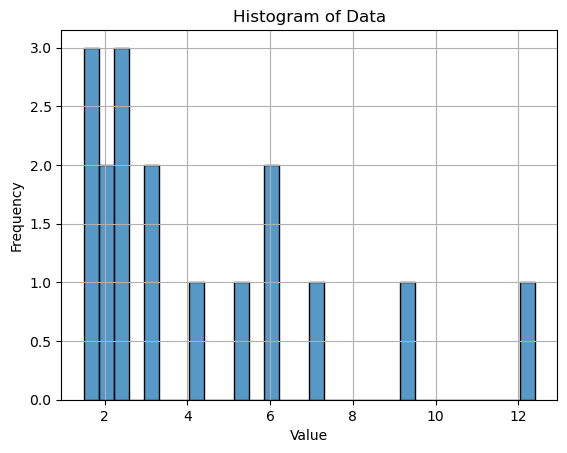

p value:0.0046
Reject null hypothesis >> The data is not normally distributed


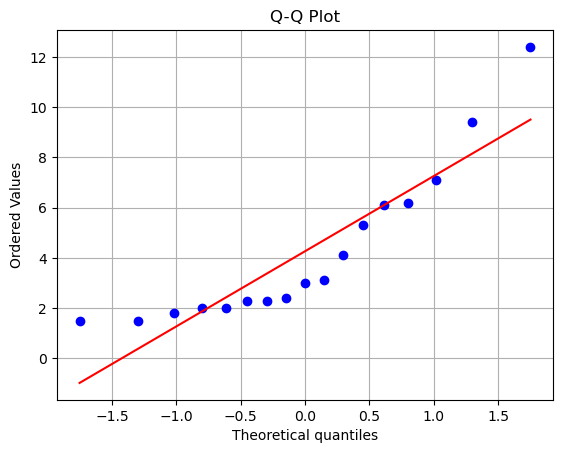

In [21]:
make_histogram(test_team)
check_normality(test_team)
make_qq_plot(test_team)

### Developer team

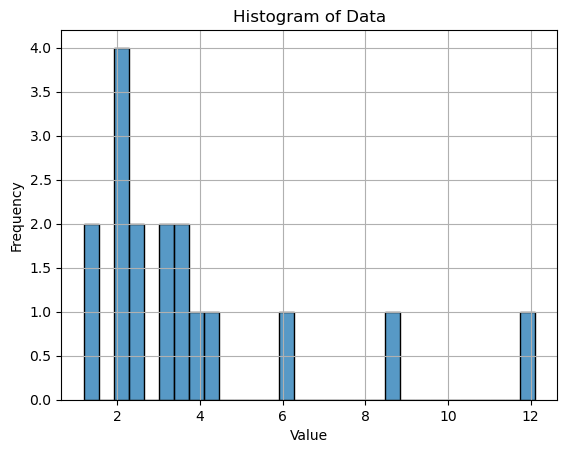

p value:0.0005
Reject null hypothesis >> The data is not normally distributed


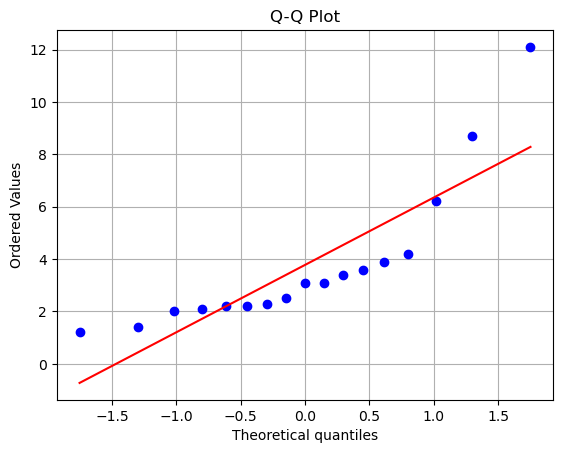

In [22]:
make_histogram(developer_team)
check_normality(developer_team)
make_qq_plot(developer_team)

### Groups are independent -> Perform Mann-Whitney

Formally <br>
$H_0$: $P(X>Y)=0.5$ <br>
Where $X$ and $Y$ are random variables representing observations from the two groups.

Another way to understand: <br>
$H_0$: The two groups come from the same distribution (no difference in medians or distribution shapes). <br>
$H_1$: The two groups come from different distributions (difference in medians or distribution shapes).

In [23]:
statistic, p_value = stats.mannwhitneyu(test_team,developer_team, alternative="two-sided")
print("p-value:%.4f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.8226
Fail to reject null hypothesis


At this significance level, it can be said that there is no statistically significant difference between the average overwork time of the two teams.

## Q4.
A venture capitalist wanted to invest in a startup that provides data compression without any loss in quality, but there are two competitors: PiedPiper and EndFrame. Initially, she believed the performance of the EndFrame could be better but still wanted to test it before the investment. Then, she gave the same files to each company to compress and recorded their performance scores. The data is below.    
    
piedpiper=[4.57, 4.55, 5.47, 4.67, 5.41, 5.55, 5.53, 5.63, 3.86, 3.97, 5.44, 3.93, 5.31, 5.17, 4.39, 4.28, 5.25]     
endframe = [4.27, 3.93, 4.01, 4.07, 3.87, 4.  , 4.  , 3.72, 4.16, 4.1 , 3.9 , 3.97, 4.08, 3.96, 3.96, 3.77, 4.09]  
**According to this information, conduct the related hypothesis testing by using a 0.05 significance level. Before doing hypothesis testing, check the related assumptions. Comment on the results.**

## Assumptions
• Data can be ranked    
• The observations are independent of one another  

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.   
Assume that alpha=0.05 If p-value is >0.05, it can be said that data is probably normality distributed.

In [40]:
piedpiper=np.array([4.57, 4.55, 5.47, 4.67, 5.41, 5.55, 5.53, 5.63, 3.86, 3.97, 5.44, 3.93, 5.31, 5.17, 4.39, 4.28, 5.25])
endframe = np.array([4.27, 3.93, 4.01, 4.07, 3.87, 4.  , 4.  , 3.72, 4.16, 4.1 , 3.9 , 3.97, 4.08, 3.96, 3.96, 3.77, 4.09])

### Check piedpiper normality

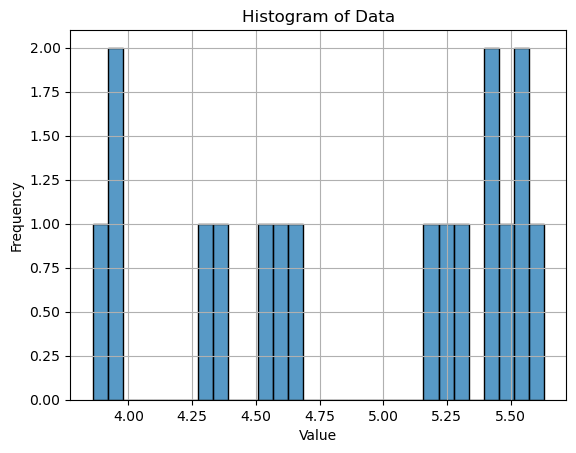

p value:0.0304
Reject null hypothesis >> The data is not normally distributed


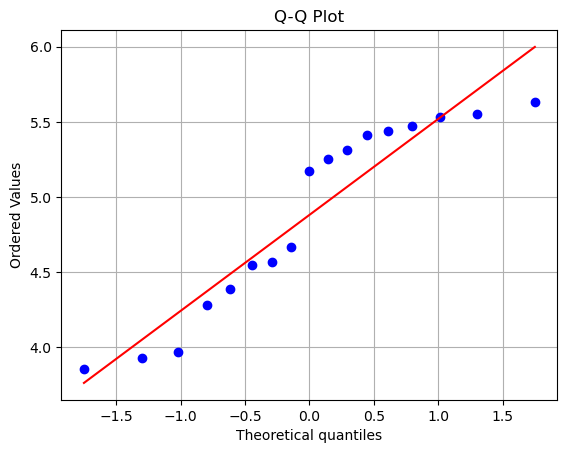

In [41]:
make_histogram(piedpiper)
check_normality(piedpiper)
make_qq_plot(piedpiper)

### Check endframe normality

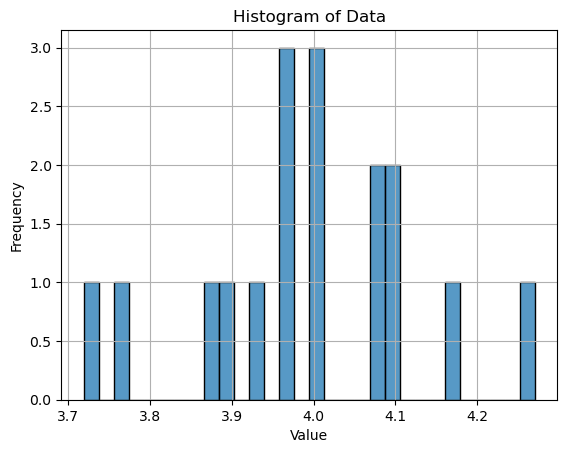

p value:0.9587
Fail to reject null hypothesis >> The data is probably normally distributed


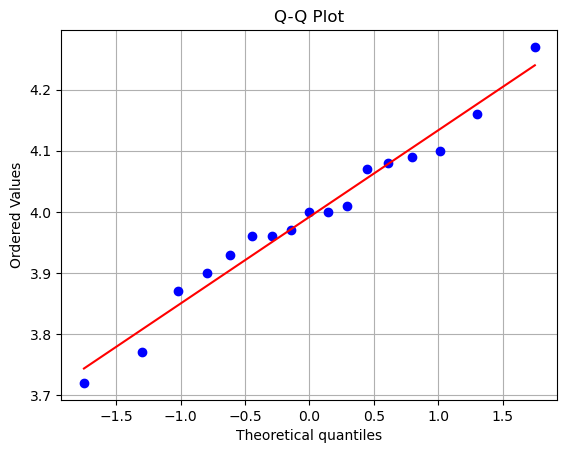

In [42]:
make_histogram(endframe)
check_normality(endframe)
make_qq_plot(endframe)

$H_{0}$: $\theta_{d} >= 0 $ 
where $\theta_d$ represents the population median of the differences between paired observations.  
This means the median of the differences is zero or greater, implying no significant difference.    
  
$H_{1}$: $\theta_{d} < 0 $ **or**  The true mean difference is smaller than zero.  
This suggests that the median of the differences is negative, indicating that one group tends to have larger values than the other.

In [28]:
test,pvalue = stats.wilcoxon(endframe,piedpiper) ## alternative default two sided
print("p-value:%.6f" %pvalue, ">> one_tailed_pval:%.6f" %(pvalue/2))

test,one_sided_pvalue = stats.wilcoxon(endframe, piedpiper, alternative="less")
print("one sided pvalue:%.6f" %(one_sided_pvalue))
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.000214 >> one_tailed_pval:0.000107
one sided pvalue:0.000107
Reject null hypothesis
